<a href="https://colab.research.google.com/github/wileyloyd/wileyloyd.github.io/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation of Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import whiten
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import plotnine as p9

# Loading in the Data

In [3]:
medical_data = pd.read_csv("/content/drive/MyDrive/OneDrive-Personal/wgu/D212 - Data Mining II/medical_clean.csv")
pd.set_option('display.max_columns', None)

# Validation of Missingness

<Axes: >

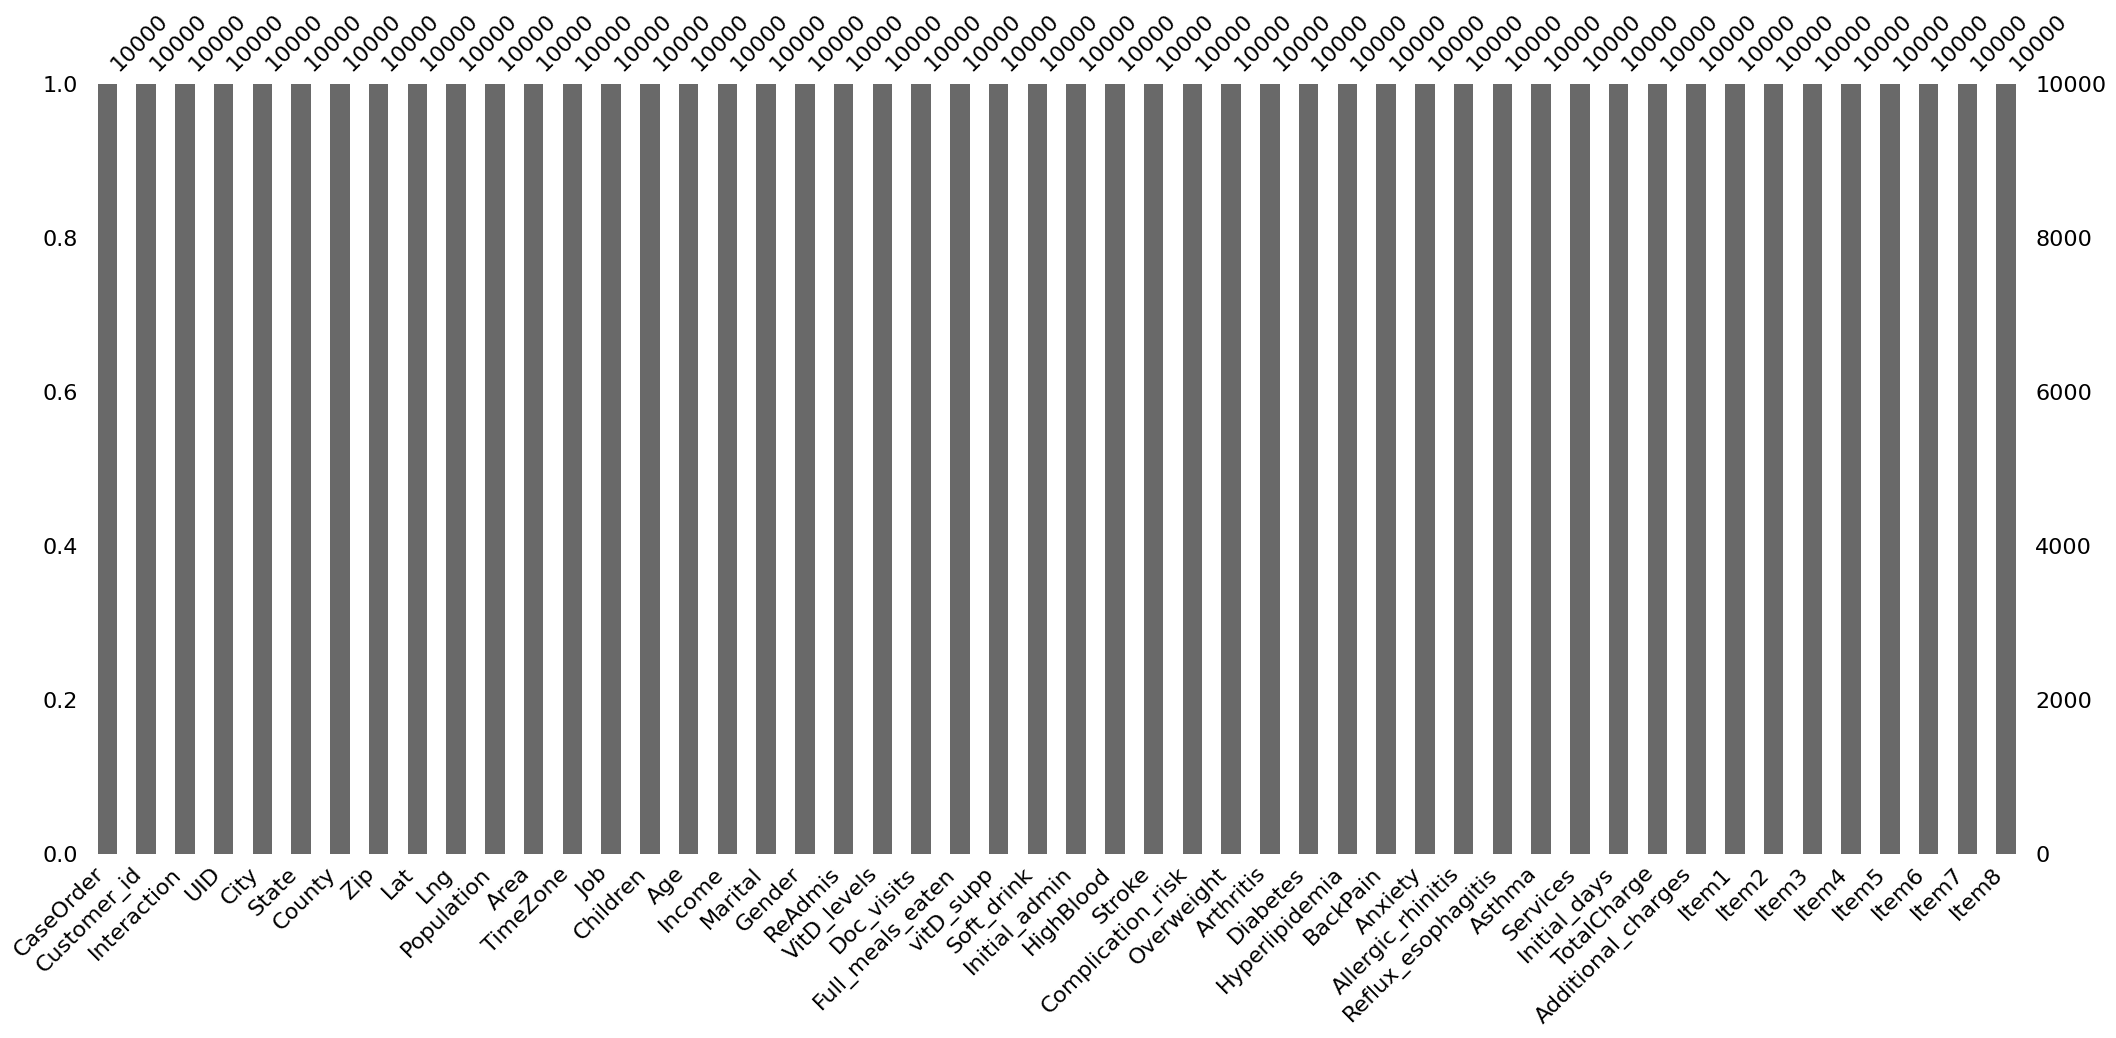

In [4]:
msno.bar(medical_data)

In [5]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [6]:
medical_data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


# Data Preperation

In [7]:
readmis = medical_data[['Initial_days', 'TotalCharge']]
readmis = whiten(readmis)
readmis = pd.DataFrame(readmis, columns=['Initial_days', 'TotalCharge'])

# Building the Model

In [8]:
link_readmis = linkage(readmis, method='ward', metric='euclidean')
readmis['cluster_labels'] = fcluster(link_readmis, t=2, criterion='maxclust')

In [9]:
readmis.to_csv('/content/drive/MyDrive/OneDrive-Personal/wgu/D212 - Data Mining II/Task 1/cleaned_data_set.csv', index=False)

## Agglomerative Model and the Calinski-Harabasz index

In [10]:
X = readmis.drop('cluster_labels', axis=1)
aggclust_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = aggclust_ward.fit_predict(X)

ch_score = calinski_harabasz_score(X, labels)

print('Calinski-Harabasz index: ', ch_score)

Calinski-Harabasz index:  98769.22330574607


# Model Evaluation and Verification

In [ ]:
dendrogram(link_readmis)
plt.show()

unlabeled_data = readmis.drop('cluster_labels', axis=1)
ss = silhouette_score(unlabeled_data, readmis['cluster_labels'])
print('Silhouette Score: ', ss)

In [ ]:
readmis[readmis['cluster_labels'] == 1].describe()

In [ ]:
readmis[readmis['cluster_labels'] == 2].describe()

In [ ]:
p9.ggplot(readmis) + p9.aes(x='cluster_labels') + p9.geom_bar()

In [ ]:
sns.scatterplot(data=readmis, x='Initial_days', y='TotalCharge', hue='cluster_labels')
plt.show()

In [ ]:
sns.scatterplot(data=medical_data, x='Initial_days', y='TotalCharge', hue='ReAdmis')
plt.show()